In [1]:
#===========DEPENDENCIES=============
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import requests

from datetime import datetime

pd.set_option('display.max_columns', None)

In [2]:
#============IMPORT==============
csv_file_path = os.path.join('Resources', 'accidents_2014.csv')
traffic_df = pd.read_csv(csv_file_path)

In [3]:
#============DROP BLANK COLUMNS===========

traffic_df.dropna(
    axis=1,
    how='all',
    inplace=True
)

#============DROP BLANK ROWS WITH BLANK VALUES==========

traffic_df['Junction_Control'].replace(
    np.nan, 'None', inplace=True)

traffic_df.replace(
    '', np.nan, inplace=True)

traffic_df.replace(
    'Unknown', np.nan, inplace=True)

traffic_df.dropna(axis=0, inplace=True)

#===========REPLACING ERRANT/MISPELLED VALUES===============

traffic_df['Light_Conditions'].replace(
    'Darkeness: No street lighting',
    'Darkness: No street lighting', 
    inplace=True
)

traffic_df['Pedestrian_Crossing-Physical_Facilities'].replace(
    'non-junction pedestrian crossing',
    'Non-junction Pedestrian Crossing', 
    inplace=True
)

#===========RENAMING COLUMNS===============

traffic_df.rename(columns=
    {'Accident_Index' : 'Accident Index',
     'Longitude' : 'Longitude', 
     'Latitude' : 'Latitude', 
     'Police_Force' : 'Police Force', 
     'Accident_Severity' : 'Accident Severity', 
     'Number_of_Vehicles' : 'Number of Vehicles', 
     'Number_of_Casualties' : 'Number of Casualties', 
     'Date' : 'Date', 
     'Day_of_Week' : 'Day of Week', 
     'Time' : 'Time', 
     'Local_Authority_(District)' : 'Local Authority District', 
     'Local_Authority_(Highway)' : 'Local Authority Highway', 
     '1st_Road_Class' : '1st Road Class', 
     '1st_Road_Number' : '1st Road Number', 
     'Road_Type' : 'Road Type', 
     'Speed_limit' : 'Speed Limit', 
     'Junction_Control' : 'Junction Control', 
     '2nd_Road_Class' : '2nd Road Class', 
     '2nd_Road_Number' : '2nd Road Number', 
     'Pedestrian_Crossing-Human_Control' : 'Pedestrian Crossing Human Control', 
     'Pedestrian_Crossing-Physical_Facilities' : 'Pedestrian Crossing Physical Facilities', 
     'Light_Conditions' : 'Light Conditions', 
     'Weather_Conditions' : 'Weather Conditions', 
     'Road_Surface_Conditions' : 'Road Surface Conditions', 
     'Special_Conditions_at_Site' : 'Special Conditions at Site', 
     'Carriageway_Hazards' : 'Carriageway Hazards', 
     'Urban_or_Rural_Area' : 'Urban or Rural Area', 
     'Did_Police_Officer_Attend_Scene_of_Accident' : 'Police Attended Scene of Accident', 
     'LSOA_of_Accident_Location' : 'LSOA of Accident Location', 
     'Year' : 'Year', 
    }, inplace=True)

# format Date in Datetime format
traffic_df['Date'] = pd.to_datetime(traffic_df['Date'], format='%d/%m/%y')

# display cleaned file
traffic_df.head()

,Accident Index,Longitude,Latitude,Police Force,Accident Severity,Number of Vehicles,Number of Casualties,Date,Day of Week,Time,Local Authority District,Local Authority Highway,1st Road Class,1st Road Number,Road Type,Speed Limit,Junction Control,2nd Road Class,2nd Road Number,Pedestrian Crossing Human Control,Pedestrian Crossing Physical Facilities,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site,Carriageway Hazards,Urban or Rural Area,Police Attended Scene of Accident,LSOA of Accident Location,Year
0,201401BS70001,-0.206443,51.496345,1,3,2,1,2014-01-09,5,13:21,12,E09000020,3,315,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,No,E01002814,2014
1,201401BS70006,-0.171308,51.495892,1,3,2,1,2014-01-09,5,8:50,12,E09000020,3,4,Single carriageway,30,Giveway or uncontrolled,3,4,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002821,2014
2,201401BS70009,-0.201326,51.498245,1,3,2,1,2014-01-10,6,18:25,12,E09000020,3,315,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002817,2014
3,201401BS70011,-0.207445,51.507511,1,3,2,1,2014-01-10,6,10:55,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002871,2014
4,201401BS70013,-0.179731,51.497822,1,3,2,1,2014-01-05,1,20:26,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,5,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002892,2014


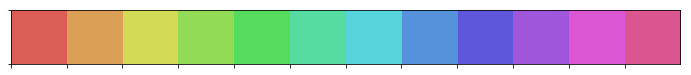

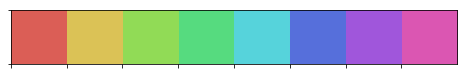

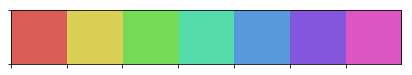

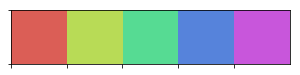

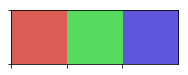

In [4]:
# ----------------------------------------------------------------------
# **Part 2: Set up overall formatting**
# ----------------------------------------------------------------------
# create color palette with 12 colors (for use with monthly data)
twelveColorPalette = sns.color_palette('hls', 12)
twelve = sns.palplot(twelveColorPalette)

# create color palette with 8 colors (for use with weather conditions)
eightColorPalette = sns.color_palette('hls', 8)
eight = sns.palplot(eightColorPalette)

# create color palette with 7 colors (for use with day of the week analysis)
sevenColorPalette = sns.color_palette('hls', 7)
seven = sns.palplot(sevenColorPalette)

# create color palette with 5 colors (for use with road/light conditions)
fiveColorPalette = sns.color_palette('hls', 5)
five = sns.palplot(fiveColorPalette)

# create color palette with 3 colors (for data by severity)
threeColorPalette = sns.color_palette('hls', 3)
three = sns.palplot(threeColorPalette)

# display color palettes
three
five
seven
eight
twelve


In [5]:
traffic_df['Date'] = pd.to_datetime(traffic_df['Date'], dayfirst=True)
traffic_df['Month'] = traffic_df['Date'].dt.month
traffic_df['Day'] = traffic_df['Date'].dt.day

In [6]:
# convert 
def to_hour(time):
    try:
        hour = datetime.strptime(str(time), '%H:%M')
        return int(datetime.strftime(hour, '%H'))
    except Exception:
        return 0

traffic_df['Hour of Day'] = traffic_df['Time'].apply(to_hour)

In [7]:
accidents_by_weeknum = traffic_df.groupby(['Day of Week']).sum()['Number of Casualties'].to_frame().reset_index()
accidents_by_date = traffic_df.groupby(['Date', 'Day of Week', 'Month']).sum()['Number of Casualties'].to_frame().reset_index()
accidents_by_hour = traffic_df.groupby(['Day of Week','Hour of Day']).sum()['Number of Casualties'].to_frame().reset_index()

In [8]:
accidents_by_hour_pivot = accidents_by_hour.pivot_table(values=['Number of Casualties'], 
                                                  index=['Hour of Day'], columns=['Day of Week'])
accidents_by_hour_pivot.columns = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

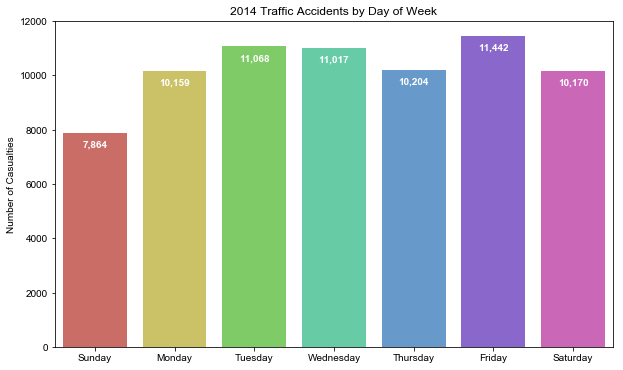

In [9]:
plt.figure(figsize=(10,6))
b = sns.barplot(x='Day of Week', y='Number of Casualties', data=accidents_by_weeknum, palette=sevenColorPalette)
sns.set_style('darkgrid')
plt.xticks(np.arange(0,7,1), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))
plt.xlabel('')
plt.ylabel('Number of Casualties')

ax = b.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}".format(p.get_height()), xy=((p.get_x() + p.get_width() / 2., p.get_height()-500)),
                ha='center', va='center', color='white', xytext=(0, 2), 
                textcoords='offset points', weight='bold')  

plt.title('2014 Traffic Accidents by Day of Week')
plt.savefig('2014-accidents-by-dayofweek.png')

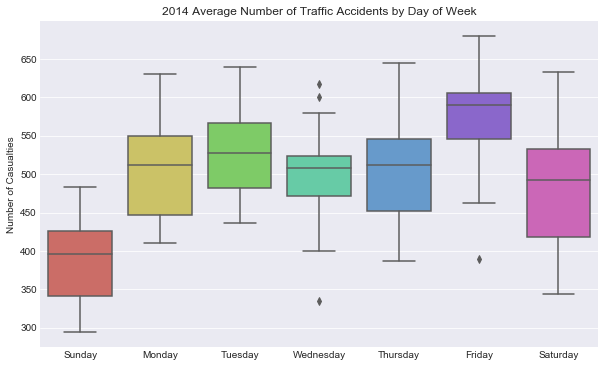

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Day of Week', y='Number of Casualties', data=accidents_by_date, palette=sevenColorPalette)
sns.set_style('darkgrid')
plt.xlabel('')
plt.ylabel('Number of Casualties')
plt.xticks(np.arange(0,7,1),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))
plt.title('2014 Average Number of Traffic Accidents by Day of Week')
plt.savefig('2014-avg-accidents-per-dayofweek.png')

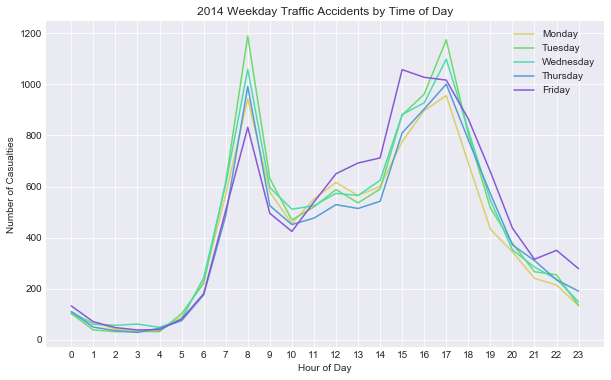

In [11]:
x_axis = accidents_by_hour_pivot.index
plt.figure(figsize=(10,6))
plt.grid(b='on')
plt.plot(x_axis, accidents_by_hour_pivot['Monday'], color='#DACF68')
plt.plot(x_axis, accidents_by_hour_pivot['Tuesday'], color='#6CDB69')
plt.plot(x_axis, accidents_by_hour_pivot['Wednesday'], color='#4CDCAE')
plt.plot(x_axis, accidents_by_hour_pivot['Thursday'], color='#559BD6')
plt.plot(x_axis, accidents_by_hour_pivot['Friday'], color='#8757D4')
plt.xticks(np.arange(len(x_axis)),x_axis)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Casualties')
plt.legend()
plt.title("2014 Weekday Traffic Accidents by Time of Day")
plt.savefig('2014-weekday-accidents-by-hour.png')

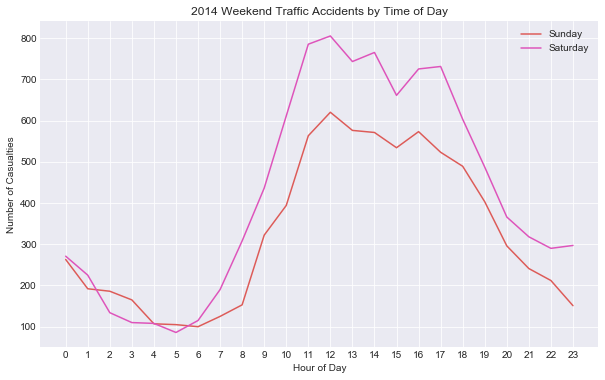

In [12]:
x_axis = accidents_by_hour_pivot.index
plt.figure(figsize=(10,6))
plt.grid(b='on')
plt.plot(accidents_by_hour_pivot['Sunday'], color='#DD5B58')
plt.plot(accidents_by_hour_pivot['Saturday'], color='#DE54BB')
plt.xticks(np.arange(len(x_axis)), x_axis)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Casualties')
plt.legend()
plt.title("2014 Weekend Traffic Accidents by Time of Day")
plt.savefig('2014-weekend-accidents-by-hour.png')

In [13]:
# convert 
traffic_df['Urban or Rural Area'] = [str('Urban') if value==1 else str('Rural') if value==2 else str('Neither') 
                                     for value in traffic_df['Urban or Rural Area']]

area_road_type = traffic_df.groupby(['Urban or Rural Area','Road Type']).sum()['Number of Casualties'].to_frame().reset_index()
urban_road = area_road_type.loc[area_road_type['Urban or Rural Area']=='Urban',:]
rural_road = area_road_type.loc[area_road_type['Urban or Rural Area']=='Rural',:]

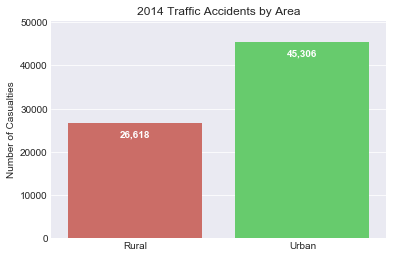

In [14]:
area_type = area_road_type.groupby(area_road_type['Urban or Rural Area']).sum()['Number of Casualties'].to_frame().reset_index()
g = sns.barplot(x='Urban or Rural Area', y='Number of Casualties', data=area_type, palette=threeColorPalette)
sns.set_style('darkgrid')
plt.xlabel('')
plt.ylim(0,max(area_type['Number of Casualties'])+5000)

ax = g.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}".format(p.get_height()), xy=((p.get_x() + p.get_width() / 2., p.get_height()-3000)),
                ha='center', va='center', color='white', xytext=(0, 2), 
                textcoords='offset points', weight='bold')  
ax.tick_params
plt.title('2014 Traffic Accidents by Area')
plt.savefig('2014-accidents-by-areatype.png')


In [15]:
urban_road['Road Type']

5      Dual carriageway
6        One way street
7            Roundabout
8    Single carriageway
9             Slip road
Name: Road Type, dtype: object

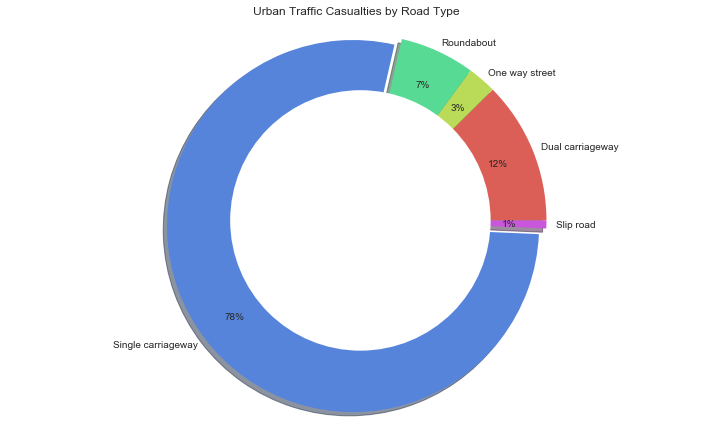

In [16]:
explode = (0.0,0.0,0.0,0.05,0.0)
plt.figure(figsize=(10,6))

plt.pie(urban_road['Number of Casualties'], explode=explode, labels=urban_road['Road Type'], 
        labeldistance=1.05, autopct='%.0f%%', pctdistance=0.8, shadow=True, colors=fiveColorPalette)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.title('Urban Traffic Casualties by Road Type')
plt.savefig('2014-urban-accidents-by-roadtype.png')

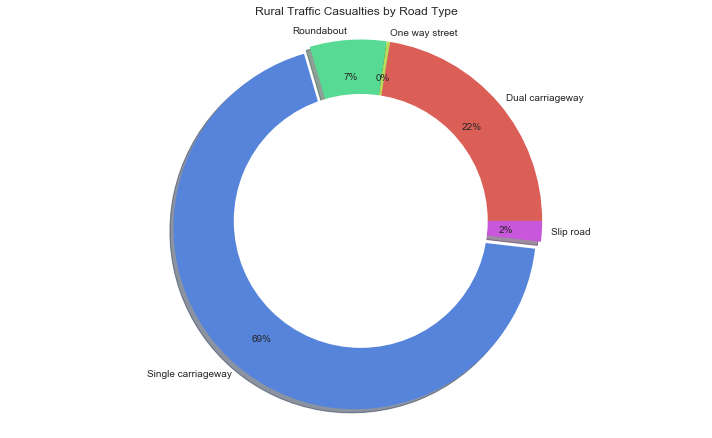

In [17]:
explode = (0.0,0.0,0.0,0.05,0.0)
plt.figure(figsize=(10,6))

plt.pie(rural_road['Number of Casualties'], explode=explode, labels=rural_road['Road Type'], 
        labeldistance=1.05, autopct='%.0f%%', pctdistance=0.8, shadow=True, colors=fiveColorPalette)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.title('Rural Traffic Casualties by Road Type')
plt.savefig('2014-rural-accidents-by-roadtype.png')

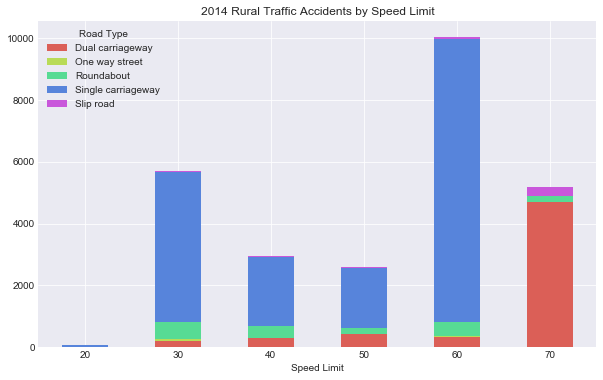

In [18]:
accidents_speed = traffic_df.groupby(['Urban or Rural Area', 
                                      'Road Type',
                                      'Speed Limit']).sum()['Number of Casualties'].to_frame().reset_index()
rural_accidents_speed = accidents_speed.loc[accidents_speed['Urban or Rural Area']=='Rural',:]
rural_accidents_speed = rural_accidents_speed.pivot_table(values='Number of Casualties', 
                                                          index='Speed Limit', 
                                                          columns='Road Type', 
                                                          aggfunc=np.sum,
                                                          fill_value=0)
rural_accidents_speed.plot(kind='bar', figsize=(10,6), stacked=True, color=fiveColorPalette)
plt.xticks(rotation='horizontal')
plt.title('2014 Rural Traffic Accidents by Speed Limit')
plt.savefig('2014-rural-accidents-by-speedlimit.png')

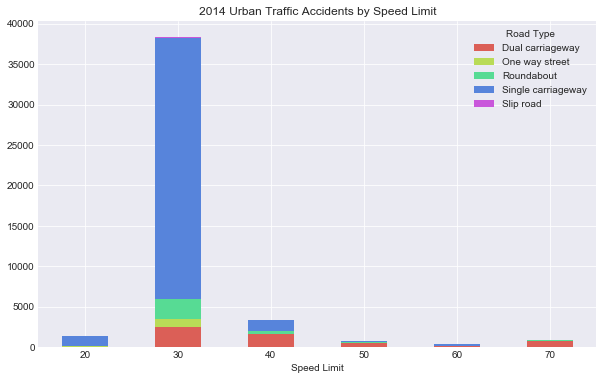

In [19]:
urban_accidents_speed = accidents_speed.loc[accidents_speed['Urban or Rural Area']=='Urban',:]
urban_accidents_speed = urban_accidents_speed.pivot_table(values='Number of Casualties', 
                                                          index='Speed Limit', 
                                                          columns='Road Type', 
                                                          aggfunc=np.sum,
                                                          fill_value=0)
urban_accidents_speed.plot(kind='bar', figsize=(10,6), stacked=True, color=fiveColorPalette)
plt.xticks(rotation='horizontal')
plt.title('2014 Urban Traffic Accidents by Speed Limit')
plt.savefig('2014-urban-accidents-by-speedlimit.png')